In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker  
%matplotlib inline

 Выбранные данные (houses_to_rent_v2.csv) отражают стоимость аренды домов в Бразилии.   Этот набор данных содержит 10692 дома для аренды с 13 различными характеристиками. 
 city - город, в котором находится недвижимость;
 area - площадь; rooms - количество комнат;  bathroom - количество ванных комнат;
 parking spaces - количество мест для парковки; floor - количество этажей; animal - разрешены ли животные; furniture - наличие мебели; hoa - стоимость налога домовладельцев; rent amount - стоимость арендной платы; property tax - стоимость имущественного налога; Fire Insurance - стоимость страховка от пожара; total - конечная стоимость аренды жилья
 

In [97]:
data = pd.read_csv('./houses_to_rent_v2.csv', index_col =False)
data.head()

city  area  rooms  bathroom  parking_spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture   hoa  rent_amount  property_tax  fire_insurance  total  
0      furnished  2065         3300           211              42   5618  
1  not furnished  1200         4960          1750              63   7973  
2  not furnished  1000         2800             0              41   3841  
3  not furnished   270         1112            22              17   1421  
4  not furnished     0          800            25              11    836

Стоимость аренды дома относительно количества комнат

Text(0.5, 1.0, 'Price by city')

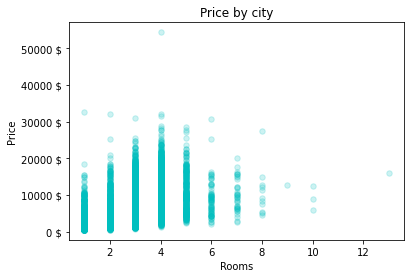

In [98]:
new_data=data[data.total < 60000]
city_data = new_data.rooms.values
total_data = new_data.total.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Price by city')

Можно отметить, что больше всего домов площадью менее 250. С увелечением площади растет и цена. 

Text(0.5, 1.0, 'Price by area')

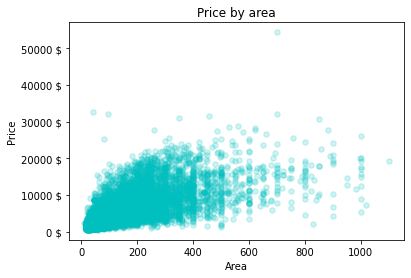

In [99]:
new_data=data[(data.area < 1250) & (data.total < 60000)]
city_data = new_data.area.values
total_data = new_data.total.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price by area')

Больше всего домов сдается в Sao Paulo.

Text(0.5, 1.0, 'Count house in diffetent city')

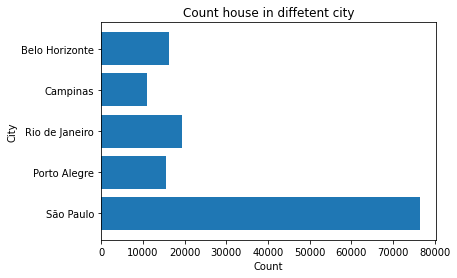

In [100]:
city_data_count = []
city_data = pd.unique(data.city)
for city in city_data:
    city_data_count.append(data[data.city == city].size)
plt.barh(city_data, city_data_count)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')

Средняя цена за дом с одной комнатой площадью больше 50 и меньше 100 по городам. 

city
Belo Horizonte    2326.000000
Campinas          2010.400000
Porto Alegre      2031.184615
Rio de Janeiro    3087.202532
São Paulo         4348.251852
Name: total, dtype: float64

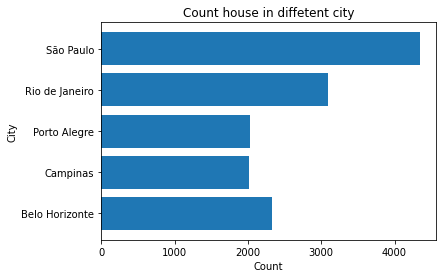

In [101]:

new_data=data[(data.rooms ==1) & (data.area > 50) & (data.area < 100)]
total_by_city= new_data.groupby('city')['total'].mean()
plt.barh(total_by_city.keys(), total_by_city)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')
total_by_city

Стоимость в São Paulo на 27% ниже, если арендовать дом площадью больше 50 и меньше 100 с двумя комнатами, нежели одной.

city
Belo Horizonte    1989.472637
Campinas          1929.046243
Porto Alegre      2075.681250
Rio de Janeiro    3391.065693
São Paulo         3403.496774
Name: total, dtype: float64

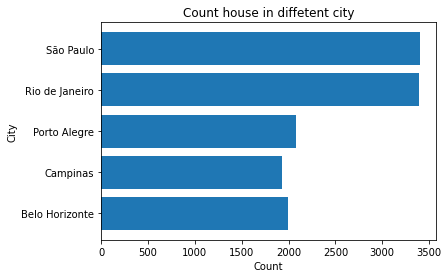

In [17]:
new_data=data[(data.rooms ==2) & (data.area > 50) & (data.area < 100)]
total_by_city= new_data.groupby('city')['total'].mean()
plt.barh(total_by_city.keys(), total_by_city)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')
total_by_city

 График имущественого налога относительно площади

Text(0, 0.5, 'Property tax')

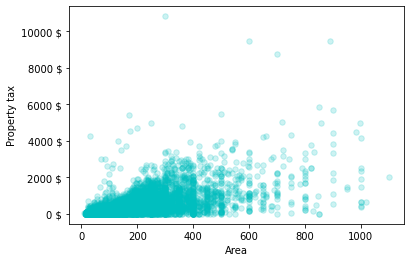

In [24]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
city_data = new_data.area.values
total_data = new_data.property_tax.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Area')
plt.ylabel('Property tax')

 График налога домовладельцев относительно площади

Text(0, 0.5, 'Property tax')

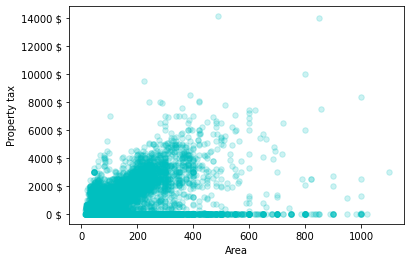

In [92]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
city_data = new_data.area.values
data = new_data.hoa.values
plt.scatter(city_data, data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Area')
plt.ylabel('Property tax')

Line Regression

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNetCV
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

model_coef:  [2.74836194]
model_intercept:  -60.541256165890616
model_coef:  [2.73808832]
model_intercept:  -59.10301881964301
r2_score:  0.41085596672823466
mse:  179836.87364172415
rmse:  424.071778879147


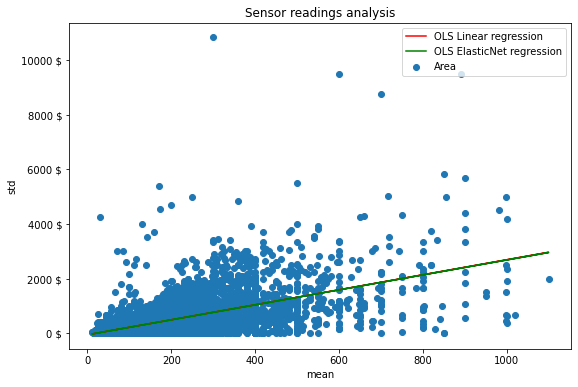

In [109]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
x = new_data.area.values
y = new_data.property_tax.values
# Делаем модель линейной регрессии
model = LinearRegression()
# ... и обучаем её 
model.fit(x.reshape(-1, 1), y)

# просмотр параметров модели
print('model_coef: ', model.coef_)
print('model_intercept: ', model.intercept_)

# Нарисуем график с обучающими данными и моделью
demo_x = x
demo_y = model.predict(demo_x.reshape(-1, 1))

plt.figure(figsize = (9, 6))
plt.scatter(x, y, label = 'Area')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.plot(demo_x, demo_y, color = 'r', label = 'OLS Linear regression')
plt.xlabel('mean')
plt.ylabel('std')
plt.title('Sensor readings analysis')
# plt.legend()


# Делаем модель линейной регрессии
model = ElasticNet(alpha=91.265996, l1_ratio=0.500000)
# ... и обучаем её 
model.fit(x.reshape(-1, 1), y)

# просмотр параметров модели
print('model_coef: ', model.coef_)
print('model_intercept: ', model.intercept_)

# Нарисуем график с обучающими данными и моделью
demo_x = x
demo_y = model.predict(demo_x.reshape(-1, 1))

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.plot(demo_x, demo_y, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('r2_score: ',r2_score(y, demo_y))
print('mse: ', mean_squared_error(y, demo_y))
print('rmse: ', np.sqrt(mean_squared_error(y, demo_y)))

r2_score:  0.41086170782391485
mse:  179835.12116586068
rmse:  424.06971262501247


<AxesSubplot:ylabel='Count'>

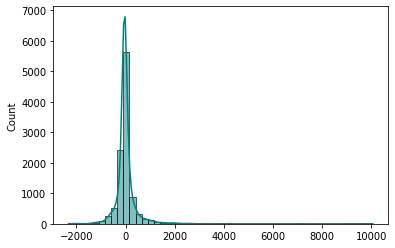

In [53]:
print('r2_score: ',r2_score(y, demo_y))
print('mse: ', mean_squared_error(y, demo_y))
print('rmse: ', np.sqrt(mean_squared_error(y, demo_y)))
errors = y - demo_y
sns.histplot(errors, color="teal", kde=True, bins=50)

Elastic Net Regression

<AxesSubplot:ylabel='Count'>

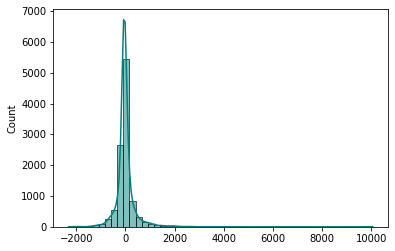

In [82]:
errors = y - demo_y
sns.histplot(errors, color="teal", kde=True, bins=50)

In [80]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 100.0]
model = ElasticNetCV(cv=cv, n_jobs=-1)
# fit model
model.fit(x.reshape(-1, 1), y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 91.265996
l1_ratio_: 0.500000
